In [436]:
#import the required libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os
import warnings
warnings.filterwarnings('ignore')

In [437]:
#loading and reading the loan data using pandas
df=pd.read_csv('train.csv')

# print top 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [438]:
# Check number of rows and columns
df.shape

(1460, 81)

In [439]:
# Understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [440]:
# check shape
df.shape

(1460, 81)

In [441]:
# Rows and columns with missing values
print("# empty rows: {}".format(df.isnull().all(axis=1).sum()))
print("# empty columns: {}".format(df.isnull().all(axis=0).sum()))

# empty rows: 0
# empty columns: 0


In [442]:
# Check null & missing values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Preparation 

In [443]:
## Checking the percentage of Null values
df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [444]:
# we will drop the 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'column becuase there are so many missing values and id column is not required
df = df.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [445]:
## Checking the percentage of Null values

df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53
BsmtCond,2.53


In [446]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [447]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [448]:
# Numeric columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [449]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [450]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [451]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [452]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [453]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [454]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [455]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [456]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [457]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [458]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [459]:
df['MasVnrArea'].value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [460]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [461]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [462]:
## I will drop the LotFontgage columns as it have more null
df.drop("LotFrontage",axis = 1, inplace=True)

In [463]:
# Imputing the Nan Values with 'No Basementh_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    df[col] = df[col].fillna('No_Basement')

In [464]:
#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('No_Garage')

In [465]:
for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [466]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [468]:
df.isnull().values.any()

False

In [469]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [470]:
df.shape

(1460, 74)

In [471]:
df['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [472]:
df['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [473]:
df['3SsnPorch'].value_counts()

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

In [474]:
# I am dropping these columns as it dominated by one value and it won't add any extra information to our model
df = df.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)


In [475]:
df.shape

(1460, 71)

## EDA

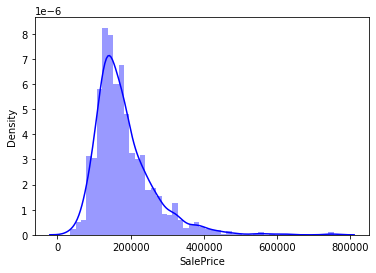

In [476]:
# Using Distplot for Sale price
plt.figure()
sns.distplot(df['SalePrice'],color='b')
plt.show()

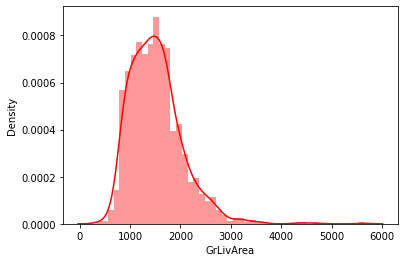

In [477]:
# Using Distplot for GrLivArea
plt.figure()
sns.distplot(df['GrLivArea'],color='r')
plt.show()

In [478]:
# Selecting Numeric columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [479]:
# Calculatinf IQR to remove the outlier
cols = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] # one or more

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

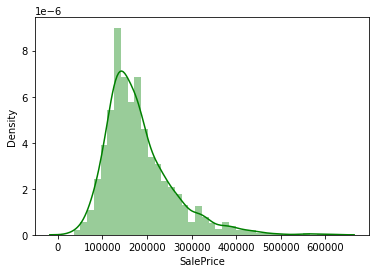

In [480]:
# Using Distplot for Sale price
plt.figure()
sns.distplot(df['SalePrice'],color='g')
plt.show()

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1334 non-null   int64  
 1   MSZoning       1334 non-null   object 
 2   LotArea        1334 non-null   int64  
 3   Street         1334 non-null   object 
 4   LotShape       1334 non-null   object 
 5   LandContour    1334 non-null   object 
 6   Utilities      1334 non-null   object 
 7   LotConfig      1334 non-null   object 
 8   LandSlope      1334 non-null   object 
 9   Neighborhood   1334 non-null   object 
 10  Condition1     1334 non-null   object 
 11  Condition2     1334 non-null   object 
 12  BldgType       1334 non-null   object 
 13  HouseStyle     1334 non-null   object 
 14  OverallQual    1334 non-null   int64  
 15  OverallCond    1334 non-null   int64  
 16  YearBuilt      1334 non-null   int64  
 17  YearRemodAdd   1334 non-null   int64  
 18  RoofStyl

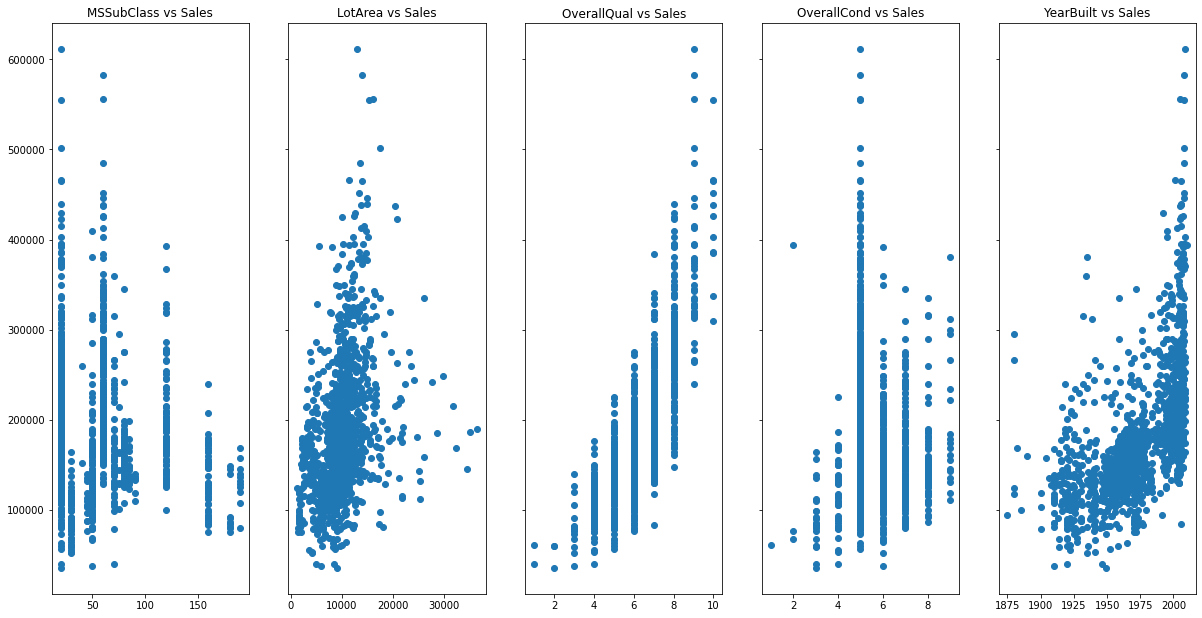

In [482]:
fig, ax = plt.subplots(ncols=5, sharey=True)

MSSubClassVsSalePrice = ax[0].scatter(df['MSSubClass'], df['SalePrice'])
MSSubClassVsSalePrice.set_label("MSSubClass")
ax[0].set_title('MSSubClass vs Sales')


LotAreaVsSalePrice = ax[1].scatter(df['LotArea'], df['SalePrice'])
LotAreaVsSalePrice.set_label("LotArea")
ax[1].set_title('LotArea vs Sales')

OverallQualVsSalePrice = ax[2].scatter(df['OverallQual'], df['SalePrice'])
OverallQualVsSalePrice.set_label("LotArea")
ax[2].set_title('OverallQual vs Sales')

OverallCondVsSalePrice = ax[3].scatter(df['OverallCond'], df['SalePrice'])
OverallCondVsSalePrice.set_label("OverallCond")
ax[3].set_title('OverallCond vs Sales')

YearBuiltVsSalePrice = ax[4].scatter(df['YearBuilt'], df['SalePrice'])
YearBuiltVsSalePrice.set_label("YearBuilt")
ax[4].set_title('YearBuilt vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

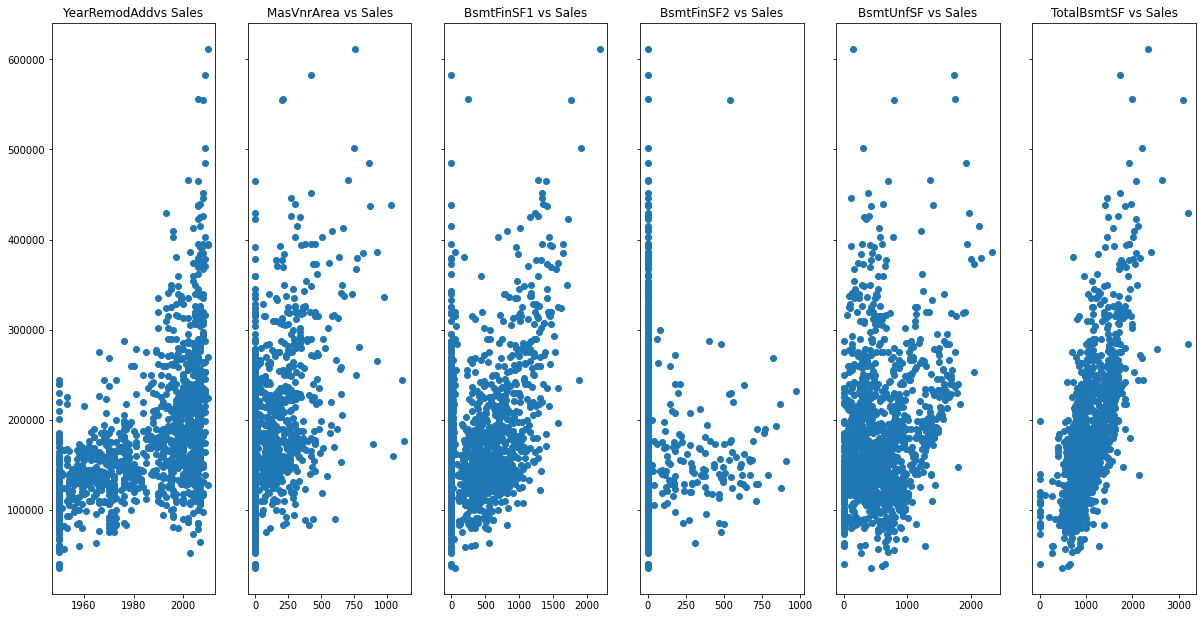

In [483]:
fig, ax = plt.subplots(ncols=6, sharey=True)

YearRemodAddVsSalePrice = ax[0].scatter(df['YearRemodAdd'], df['SalePrice'])
YearRemodAddVsSalePrice.set_label("YearRemodAdd")
ax[0].set_title('YearRemodAddvs Sales')

MasVnrAreaVsSalePrice= ax[1].scatter(df['MasVnrArea'], df['SalePrice'])
MasVnrAreaVsSalePrice.set_label("MasVnrArea")
ax[1].set_title('MasVnrArea vs Sales')

BsmtFinSF1VsSalePrice = ax[2].scatter(df['BsmtFinSF1'], df['SalePrice'])
BsmtFinSF1VsSalePrice.set_label("BsmtFinSF1")
ax[2].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2VsSalePrice = ax[3].scatter(df['BsmtFinSF2'], df['SalePrice'])
BsmtFinSF2VsSalePrice.set_label("BsmtFinSF2")
ax[3].set_title('BsmtFinSF2 vs Sales')

BsmtUnfSFVsSalePrice = ax[4].scatter(df['BsmtUnfSF'], df['SalePrice'])
BsmtUnfSFVsSalePrice.set_label("BsmtUnfSF")
ax[4].set_title('BsmtUnfSF vs Sales')

TotalBsmtSFVsSalePrice = ax[5].scatter(df['TotalBsmtSF'], df['SalePrice'])
TotalBsmtSFVsSalePrice.set_label("TotalBsmtSF")
ax[5].set_title('TotalBsmtSF vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

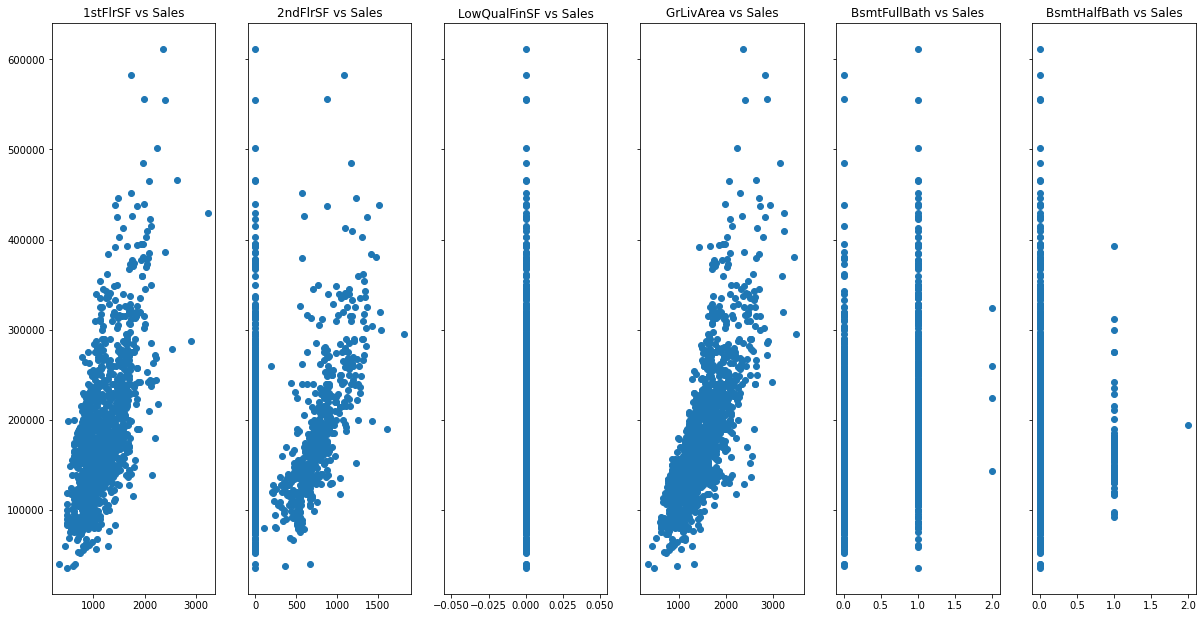

In [484]:
fig, ax = plt.subplots(ncols=6, sharey=True)

stFlrSFVsSalePrice = ax[0].scatter(df['1stFlrSF'], df['SalePrice'])
stFlrSFVsSalePrice.set_label("1stFlrSF")
ax[0].set_title('1stFlrSF vs Sales')

ndFlrSFVsSalePrice= ax[1].scatter(df['2ndFlrSF'], df['SalePrice'])
ndFlrSFVsSalePrice.set_label("2ndFlrSF")
ax[1].set_title('2ndFlrSF vs Sales')

LowQualFinSFVsSalePrice = ax[2].scatter(df['LowQualFinSF'], df['SalePrice'])
LowQualFinSFVsSalePrice.set_label("LowQualFinSF")
ax[2].set_title('LowQualFinSF vs Sales')

GrLivAreaVsSalePrice = ax[3].scatter(df['GrLivArea'], df['SalePrice'])
GrLivAreaVsSalePrice.set_label("GrLivArea")
ax[3].set_title('GrLivArea vs Sales')

BsmtFullBathVsSalePrice = ax[4].scatter(df['BsmtFullBath'], df['SalePrice'])
BsmtFullBathVsSalePrice.set_label("BsmtFullBath")
ax[4].set_title('BsmtFullBath vs Sales')

BsmtHalfBathVsSalePrice = ax[5].scatter(df['BsmtHalfBath'], df['SalePrice'])
BsmtHalfBathVsSalePrice.set_label("BsmtHalfBath")
ax[5].set_title('BsmtHalfBath vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

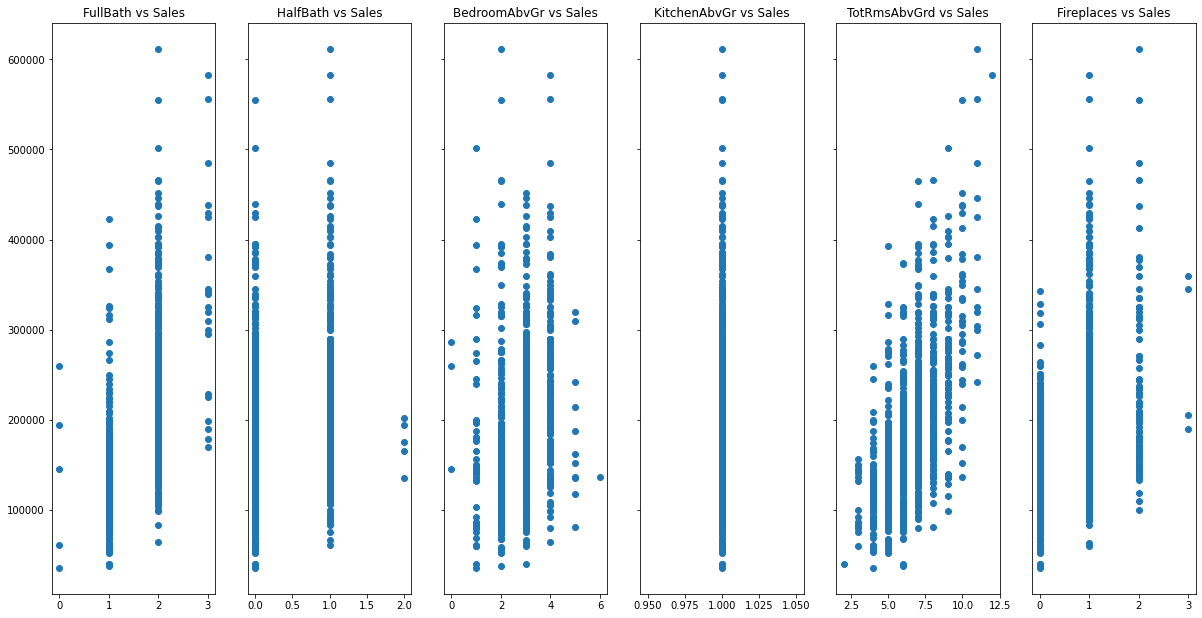

In [485]:
fig, ax = plt.subplots(ncols=6, sharey=True)

FullBathVsSalePrice = ax[0].scatter(df['FullBath'], df['SalePrice'])
FullBathVsSalePrice.set_label("FullBath")
ax[0].set_title('FullBath vs Sales')

HalfBathVsSalePrice= ax[1].scatter(df['HalfBath'], df['SalePrice'])
HalfBathVsSalePrice.set_label("HalfBath")
ax[1].set_title('HalfBath vs Sales')

BedroomAbvGrVsSalePrice = ax[2].scatter(df['BedroomAbvGr'], df['SalePrice'])
BedroomAbvGrVsSalePrice.set_label("BedroomAbvGr")
ax[2].set_title('BedroomAbvGr vs Sales')

KitchenAbvGrVsSalePrice = ax[3].scatter(df['KitchenAbvGr'], df['SalePrice'])
KitchenAbvGrVsSalePrice.set_label("KitchenAbvGr")
ax[3].set_title('KitchenAbvGr vs Sales')

TotRmsAbvGrdVsSalePrice = ax[4].scatter(df['TotRmsAbvGrd'], df['SalePrice'])
TotRmsAbvGrdVsSalePrice.set_label("TotRmsAbvGrd")
ax[4].set_title('TotRmsAbvGrd vs Sales')

FireplacesVsSalePrice = ax[5].scatter(df['Fireplaces'], df['SalePrice'])
FireplacesVsSalePrice.set_label("Fireplaces")
ax[5].set_title('Fireplaces vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()


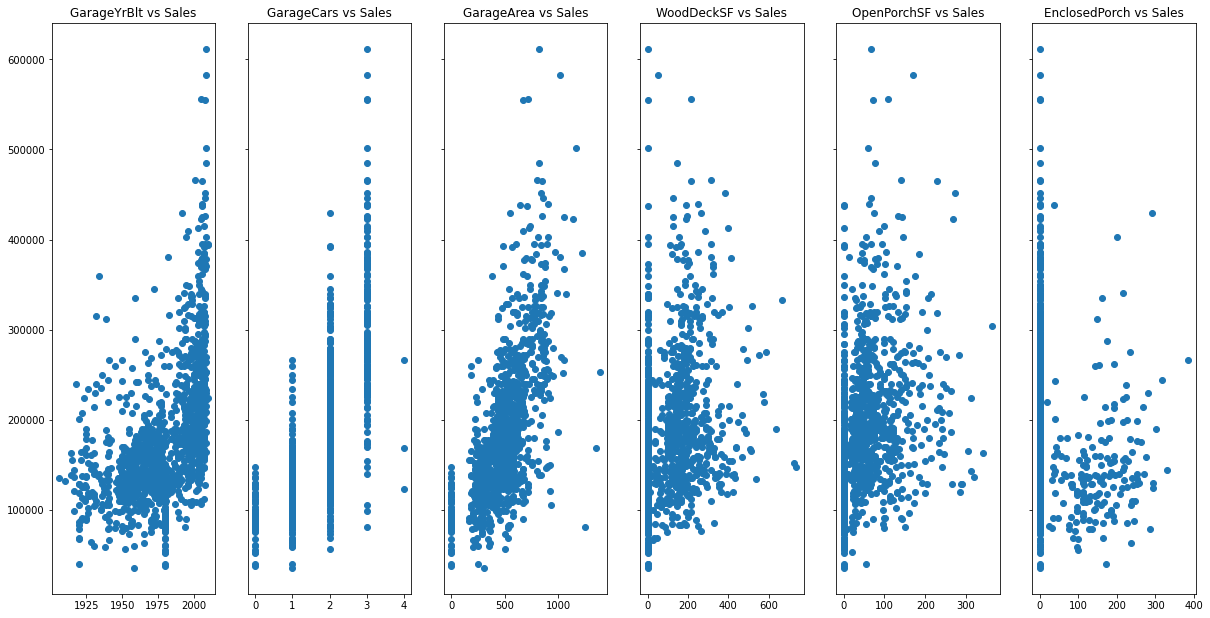

In [486]:
fig, ax = plt.subplots(ncols=6, sharey=True)

GarageYrBltsVsSalePrice = ax[0].scatter(df['GarageYrBlt'], df['SalePrice'])
GarageYrBltsVsSalePrice.set_label("GarageYrBlt")
ax[0].set_title('GarageYrBlt vs Sales')

GarageCarssVsSalePrice= ax[1].scatter(df['GarageCars'], df['SalePrice'])
GarageCarssVsSalePrice.set_label("GarageCars")
ax[1].set_title('GarageCars vs Sales')

GarageAreasVsSalePrice = ax[2].scatter(df['GarageArea'], df['SalePrice'])
GarageAreasVsSalePrice.set_label("GarageArea")
ax[2].set_title('GarageArea vs Sales')

WoodDeckSFsVsSalePrice = ax[3].scatter(df['WoodDeckSF'], df['SalePrice'])
WoodDeckSFsVsSalePrice.set_label("WoodDeckSF")
ax[3].set_title('WoodDeckSF vs Sales')

OpenPorchSFsVsSalePrice = ax[4].scatter(df['OpenPorchSF'], df['SalePrice'])
OpenPorchSFsVsSalePrice.set_label("OpenPorchSF")
ax[4].set_title('OpenPorchSF vs Sales')

EnclosedPorchsVsSalePrice = ax[5].scatter(df['EnclosedPorch'], df['SalePrice'])
EnclosedPorchsVsSalePrice.set_label("EnclosedPorch")
ax[5].set_title('EnclosedPorch vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

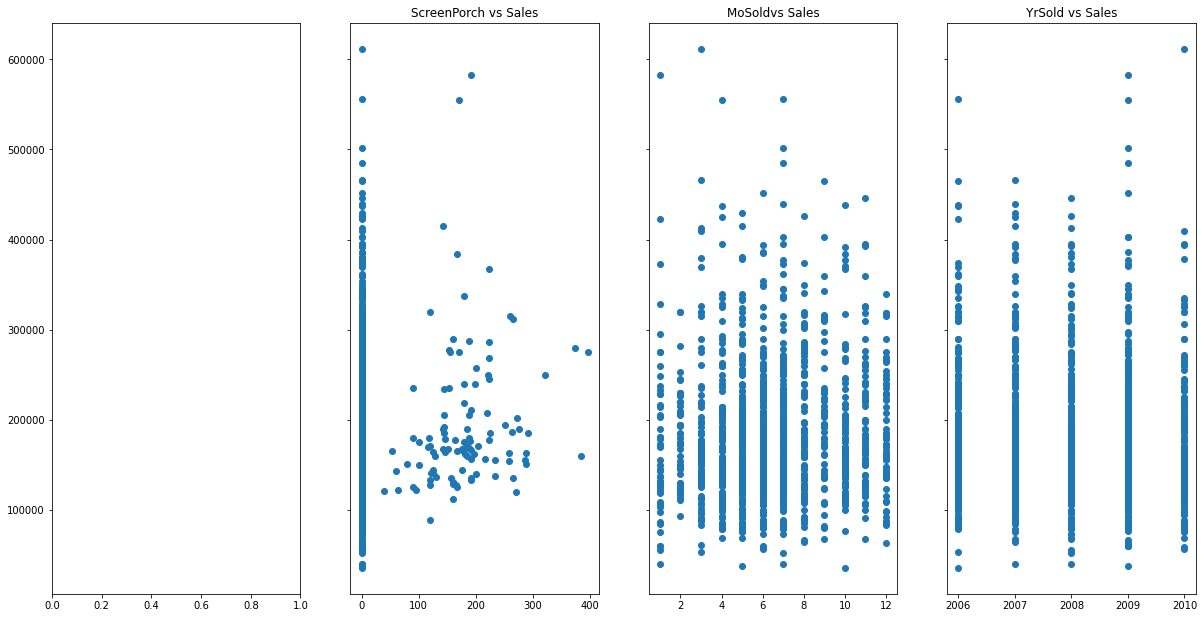

In [487]:
fig, ax = plt.subplots(ncols=4, sharey=True)


ScreenPorchVsSalePrice= ax[1].scatter(df['ScreenPorch'], df['SalePrice'])
ScreenPorchVsSalePrice.set_label("ScreenPorch")
ax[1].set_title('ScreenPorch vs Sales')

MoSoldVsSalePrice = ax[2].scatter(df['MoSold'], df['SalePrice'])
MoSoldVsSalePrice.set_label("MoSold")
ax[2].set_title('MoSoldvs Sales')

YrSoldVsSalePrice = ax[3].scatter(df['YrSold'], df['SalePrice'])
YrSoldVsSalePrice.set_label("YrSold")
ax[3].set_title('YrSold vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

In [488]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

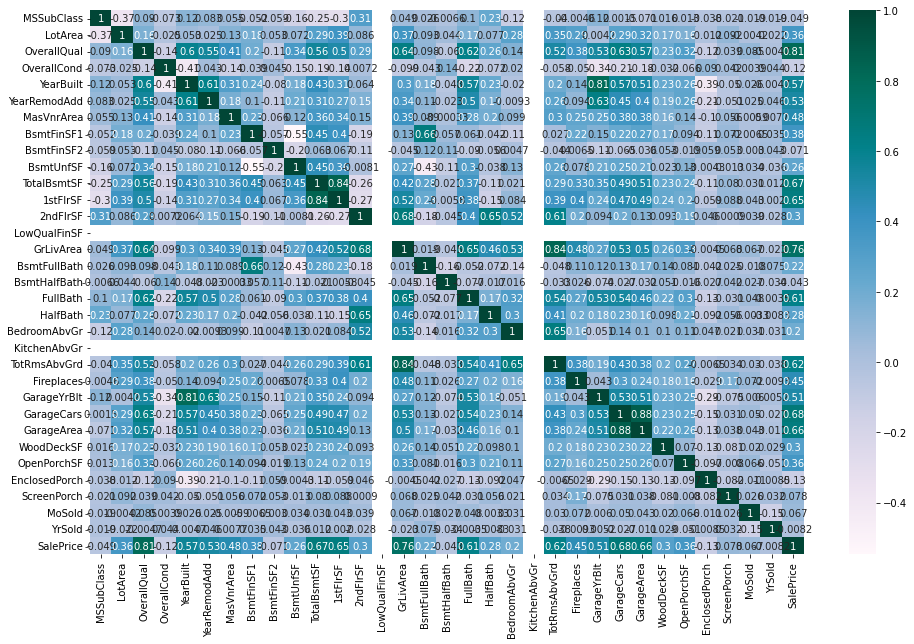

In [489]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="PuBuGn")
plt.show()

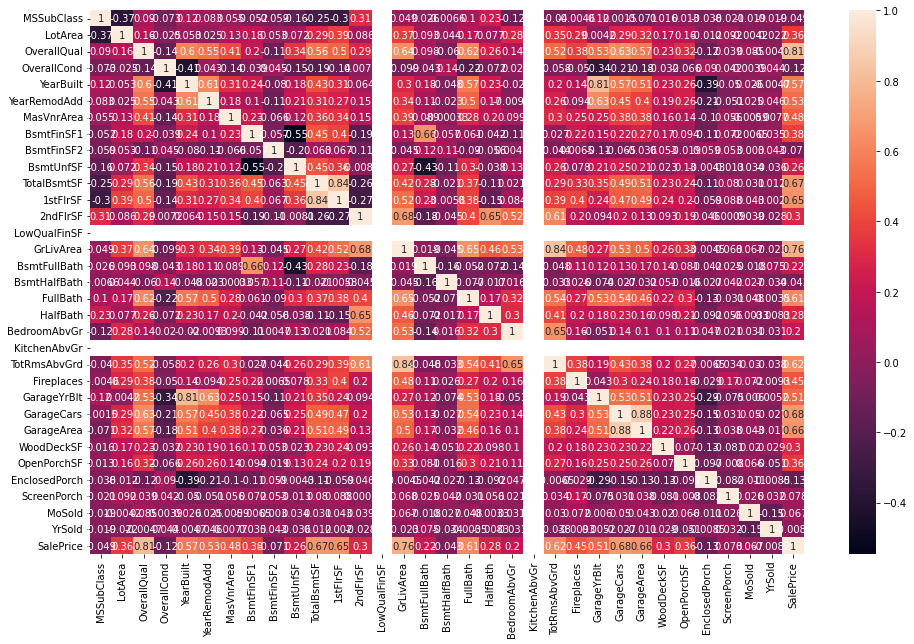

In [490]:
# correlation matrix
plt.figure(figsize = (16, 10))
corrmat = df.corr()
sns.heatmap(df[cols].corr(),annot=True)
plt.show()

## Converting categorical value into Dummy variable

In [491]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [492]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


# Model Preparation

In [493]:
# Splitting the data into train and test sets
y = df.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [494]:
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [495]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
745,60,8963,8,9,1976,1996,289.0,575,80,487,...,0,0,0,0,1,0,0,0,1,0
1133,60,9828,8,5,1995,1995,0.0,584,0,544,...,0,0,0,0,1,0,0,0,1,0
512,20,9100,5,5,1958,1958,0.0,521,174,169,...,0,0,0,0,1,0,0,0,1,0
43,20,9200,5,6,1975,1980,0.0,280,491,167,...,0,0,0,0,1,0,0,0,1,0
33,20,10552,5,5,1959,1959,0.0,1018,0,380,...,0,0,0,0,1,0,0,0,1,0


In [496]:
X_train.shape

(893, 229)

In [497]:
X_test.shape

(441, 229)

In [498]:
y_train.shape

(893,)

In [499]:
y_test.shape

(441,)

### Scaling of numeric varaibles

In [500]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
745,60,8963,8,9,1976,1996,289.0,575,80,487,...,0,0,0,0,1,0,0,0,1,0
1133,60,9828,8,5,1995,1995,0.0,584,0,544,...,0,0,0,0,1,0,0,0,1,0
512,20,9100,5,5,1958,1958,0.0,521,174,169,...,0,0,0,0,1,0,0,0,1,0
43,20,9200,5,6,1975,1980,0.0,280,491,167,...,0,0,0,0,1,0,0,0,1,0
33,20,10552,5,5,1959,1959,0.0,1018,0,380,...,0,0,0,0,1,0,0,0,1,0


In [501]:
y_train.head()

745     299800
1133    239500
512     129900
43      130250
33      165500
Name: SalePrice, dtype: int64

In [502]:
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
989,60,8125,7,5,2006,2006,0.0,0,0,770,...,0,0,1,0,0,0,0,0,0,1
1160,160,2280,6,5,1978,1978,0.0,311,0,544,...,0,0,0,0,1,0,0,0,1,0
1369,20,10635,8,5,2003,2003,171.0,370,972,315,...,0,0,0,0,1,0,0,0,1,0
329,70,6402,5,5,1920,1950,0.0,0,0,596,...,0,0,0,0,1,0,0,0,1,0
262,80,8471,6,7,1977,1995,46.0,506,0,0,...,0,0,0,0,1,0,0,0,1,0


In [503]:
y_test.head()

989     197000
1160    146000
1369    232000
329      78000
262     151000
Name: SalePrice, dtype: int64

In [504]:
# find columns those needs to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [505]:
num_vars= ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']
X_train[num_vars].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
745,60,8963,8,9,1976,1996,289.0,575,80,487,...,2,1994.0,2,831,0,204,0,0,7,2008
1133,60,9828,8,5,1995,1995,0.0,584,0,544,...,1,1995.0,2,466,0,155,0,0,6,2009
512,20,9100,5,5,1958,1958,0.0,521,174,169,...,0,1964.0,2,624,0,0,0,0,7,2006
43,20,9200,5,6,1975,1980,0.0,280,491,167,...,0,1977.0,1,308,145,0,0,0,7,2008
33,20,10552,5,5,1959,1959,0.0,1018,0,380,...,1,1959.0,2,447,0,38,0,0,4,2010


In [506]:
X_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.0,893.000000,893.000000,893.000000,893.000000
mean,53.236282,9744.223964,6.100784,5.594625,1973.170213,1985.945129,105.265398,449.254199,37.614782,563.082867,...,0.003359,0.001120,0.090705,0.001120,0.870101,0.0,0.004479,0.014558,0.825308,0.094065
std,40.444519,4255.664899,1.326231,1.097926,29.050214,20.531893,176.573179,428.183143,132.065293,428.097753,...,0.057896,0.033464,0.287351,0.033464,0.336381,0.0,0.066815,0.119841,0.379916,0.292083
min,20.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7560.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,244.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,50.000000,9353.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,402.000000,0.000000,474.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,60.000000,11426.000000,7.000000,6.000000,2002.000000,2004.000000,166.000000,728.000000,0.000000,783.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,190.000000,36500.000000,10.000000,9.000000,2009.000000,2010.000000,1129.000000,2188.000000,906.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [507]:
# Perform scaling using MinMax
scaler=MinMaxScaler()

In [508]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [509]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
745,0.235294,0.217699,0.777778,1.000,0.753731,0.766667,0.255979,0.262797,0.088300,0.208476,...,0,0,0,0,1,0,0,0,1,0
1133,0.235294,0.242273,0.777778,0.500,0.895522,0.750000,0.000000,0.266910,0.000000,0.232877,...,0,0,0,0,1,0,0,0,1,0
512,0.000000,0.221591,0.444444,0.500,0.619403,0.133333,0.000000,0.238117,0.192053,0.072346,...,0,0,0,0,1,0,0,0,1,0
43,0.000000,0.224432,0.444444,0.625,0.746269,0.500000,0.000000,0.127971,0.541943,0.071490,...,0,0,0,0,1,0,0,0,1,0
33,0.000000,0.262841,0.444444,0.500,0.626866,0.150000,0.000000,0.465265,0.000000,0.162671,...,0,0,0,0,1,0,0,0,1,0


In [510]:
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
989,0.235294,0.193892,0.666667,0.50,0.977612,0.933333,0.000000,0.000000,0.000000,0.329623,...,0,0,1,0,0,0,0,0,0,1
1160,0.823529,0.027841,0.555556,0.50,0.768657,0.466667,0.000000,0.142139,0.000000,0.232877,...,0,0,0,0,1,0,0,0,1,0
1369,0.000000,0.265199,0.777778,0.50,0.955224,0.883333,0.151461,0.169104,1.072848,0.134846,...,0,0,0,0,1,0,0,0,1,0
329,0.294118,0.144943,0.444444,0.50,0.335821,0.000000,0.000000,0.000000,0.000000,0.255137,...,0,0,0,0,1,0,0,0,1,0
262,0.352941,0.203722,0.555556,0.75,0.761194,0.750000,0.040744,0.231261,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [511]:
X_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.0,893.000000,893.000000,893.000000,893.000000
mean,0.195508,0.239893,0.566754,0.574328,0.732614,0.599085,0.093238,0.205326,0.041517,0.241046,...,0.003359,0.001120,0.090705,0.001120,0.870101,0.0,0.004479,0.014558,0.825308,0.094065
std,0.237909,0.120900,0.147359,0.137241,0.216793,0.342198,0.156398,0.195696,0.145767,0.183261,...,0.057896,0.033464,0.287351,0.033464,0.336381,0.0,0.066815,0.119841,0.379916,0.292083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.177841,0.444444,0.500000,0.597015,0.300000,0.000000,0.000000,0.000000,0.104452,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.228778,0.555556,0.500000,0.738806,0.750000,0.000000,0.183729,0.000000,0.202911,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.235294,0.287670,0.666667,0.625000,0.947761,0.900000,0.147033,0.332724,0.000000,0.335188,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [512]:
X_train.shape

(893, 229)

## Model Creation

### Using Recursive feature elimination initailly

In [513]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step = 25)  
rfe = rfe.fit(X_train, y_train)

In [514]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 4),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 4),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 5),
 ('BsmtHalfBath', False, 5),
 ('FullBath', True, 1),
 ('HalfBath', False, 6),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 6),
 ('GarageYrBlt', False, 4),
 ('GarageCars', True, 1),
 ('GarageArea', False, 6),
 ('WoodDeckSF', False, 2),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 6),
 ('ScreenPorch', True, 1),
 ('MoSold', False, 5),
 ('YrSold', False, 5),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True, 1),
 ('LotShape_IR2', Fa

In [515]:
# Important features
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageCond_Po', 'GarageCond_TA', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=114)

In [516]:
# Non-important features
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'EnclosedPorch',
       ...
       'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Normal'],
      dtype='object', length=115)

In [517]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(893, 114)
(441, 114)
(893,)
(441,)


In [518]:
lm1=lm.fit(X_train, y_train)
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-1.0038881861708298e+16
[-8.84204408e+03  4.64712640e+04  5.01351142e+04  4.77229033e+04
  4.40802351e+04  5.64755365e+03  1.73014305e+04  4.89795323e+16
  2.02812871e+16  5.22925902e+16 -7.17679984e+16  5.72927021e+16
  3.30819151e+16  1.78283264e+16 -6.17898712e+16  2.61341080e+03
 -2.27651014e+03  1.48903419e+04  1.14921811e+03 -3.79133752e+04
 -1.76868030e+15  2.54063576e+04  1.15589190e+03 -5.50691295e+03
  2.22138947e+04  1.07261161e+03  9.92328340e+03  1.07905027e+04
 -5.69362766e+01  1.70743849e+04 -2.83217809e+03 -4.66931601e+03
  4.07501121e+04  3.35868125e+04  2.88720000e+04  2.29720000e+04
  4.76940625e+04 -7.02000000e+02 -1.49070000e+04  1.56600000e+03
  9.80000000e+03 -1.41390000e+04  2.01850000e+03  4.58153687e+16
  3.35200000e+03 -7.23750000e+03 -1.42975000e+04 -3.11600000e+03
  2.53900000e+03 -4.31045000e+04  7.90187500e+03  4.85800000e+03
 -1.05800000e+04 -2.71020000e+04 -1.46960000e+04  8.67512500e+03
 -2.32920000e+04 -1.79892500e+04 -1.16300000e+04 -7.91543750e+03
 

In [519]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9329119453687352
-7.439151173868848e+18
352050041998.0
1.7112343158512043e+31
394232969.762598
3.880349922565089e+28


### Ridge Regression

In [520]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [521]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 2.0}
-16171.5175197423


In [522]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 3.65760338e+04,  5.72779405e+04,  4.11749997e+04,  4.76411015e+04,
        2.61536854e+04,  5.41820973e+04,  1.19193326e+04,  1.12368487e+04,
        4.85335692e+04,  6.14950823e+04,  3.67297814e+04,  0.00000000e+00,
        7.66842663e+04,  1.28795231e+04, -2.93986250e+04,  0.00000000e+00,
        3.34421471e+04,  2.77183581e+04,  1.26847766e+04,  1.19201735e+04,
        2.21722815e+04,  1.59184813e+04,  1.80651714e+04,  7.56693403e+03,
        3.76663566e+04, -7.60600400e+03, -1.13533701e+04,  0.00000000e+00,
       -1.15749331e+04, -5.19795611e+03, -2.43449736e+04, -1.19415313e+04,
       -1.99207514e+04, -1.64693231e+04, -2.19985271e+04, -2.07583987e+04,
       -2.60433010e+04, -1.19869782e+04, -1.27120886e+04, -1.58472488e+04,
       -1.42689662e+04, -7.94109231e+03,  3.63804898e+04, -1.84797981e+04,
       -1.50438213e+04,  8.20014764e+03, -1.70668122e+04, -9.28672350e+03,
       -8.95167984e+03, -8.91102895e+03, -2.14372762e+04, -1.75785516e+04,
        0.00000000e+00, -

In [523]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr 0.9278166617127945
r2_test_lr 0.9165003989976092
rss1_lr 378787958828.7213
rss2_lr 192074847325.443
mse_train_lr 424174645.9448167
mse_test_lr 435543871.4862653


## Lasso

In [524]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [525]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-16311.687536328554


In [526]:
alpha =50
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train1, y_train) 

Lasso(alpha=50)

In [527]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr",mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr 0.9257498019725721
r2_test_lr 0.9179618770441361
rss1_lr 389633974000.10474
rss2_lr 188712996858.0603
mse_train_lr 436320239.6417746
mse_test_lr 427920627.7960551


In [528]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.329119e-01,9.278167e-01,9.257498e-01
1,R2 Score (Test),-7.439151e+18,9.165004e-01,9.179619e-01
2,RSS (Train),3.520500e+11,3.787880e+11,3.896340e+11
3,RSS (Test),1.711234e+31,1.920748e+11,1.887130e+11
4,MSE (Train),1.985530e+04,2.059550e+04,2.088828e+04
5,MSE (Test),1.969860e+14,2.086969e+04,2.068624e+04


## Model Evaluation

In [529]:
ridge_pred = ridge.predict(X_test1)

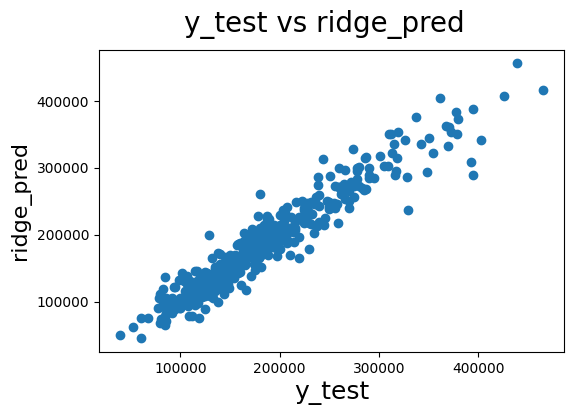

In [530]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

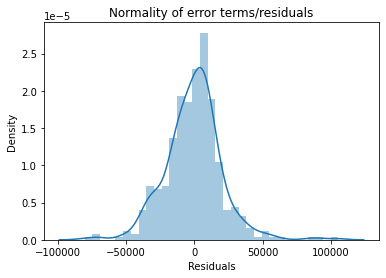

In [531]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [532]:
lasso_pred = lasso.predict(X_test1)

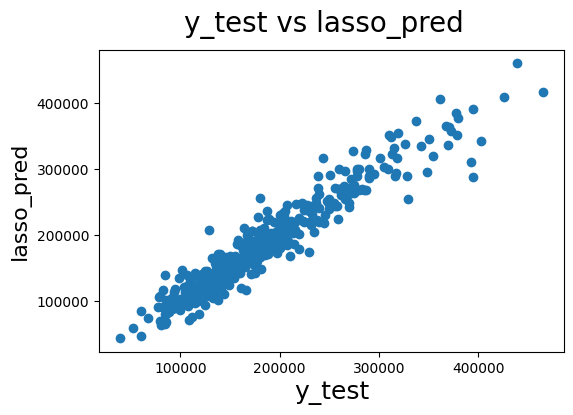

In [533]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)            
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

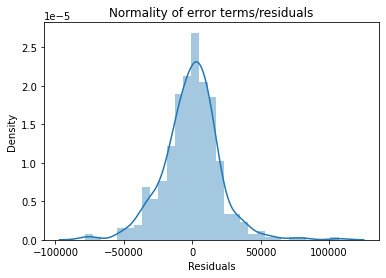

In [534]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [535]:
betas = pd.DataFrame(index=X_train1.columns)

In [536]:
betas.rows = X_train1.columns

In [537]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [538]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
LotArea,36576.033789,39449.449700
OverallQual,57277.940488,64048.013371
OverallCond,41174.999732,48657.290947
YearBuilt,47641.101454,59901.849054
MasVnrArea,26153.685434,23891.515006
BsmtFinSF1,54182.097311,43810.885391
BsmtFinSF2,11919.332608,5710.171665
BsmtUnfSF,11236.848692,0.000000
TotalBsmtSF,48533.569184,57976.070009
1stFlrSF,61495.082262,8733.102916


As per company perspective,

The company wants to know:

1. Which variables are significant in predicting the price of a house

Below are the variables those are significant in predicting the price of a house

LotArea	

OverallQual	

OverallCond	

YearBuilt	

MasVnrArea

BsmtFinS

TotalBsmtSF

TotRmsAbvGrd

GarageCars

Neighborhood_StoneBr

Street_Pave



In [539]:
# How well those variables describe the price of a house.

# We can see below metric that describe how well those variables describe the price of a house.
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.329119e-01,9.278167e-01,9.257498e-01
1,R2 Score (Test),-7.439151e+18,9.165004e-01,9.179619e-01
2,RSS (Train),3.520500e+11,3.787880e+11,3.896340e+11
3,RSS (Test),1.711234e+31,1.920748e+11,1.887130e+11
4,MSE (Train),1.985530e+04,2.059550e+04,2.088828e+04
5,MSE (Test),1.969860e+14,2.086969e+04,2.068624e+04


In [540]:
# Q1 Doubling the value of alpha

# Ridge

#Change the alpha value from 2 to 4
alpha = 4
ridge4 = Ridge(alpha=alpha)
ridge4.fit(X_train1, y_train)

Ridge(alpha=4)

In [541]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge4.predict(X_train1)
y_pred_test = ridge4.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr",mse_test_lr)
metric2.append(mse_test_lr**0.5)


r2_train_lr 0.9228351639914778
r2_test_lr 0.9182971026491835
rss1_lr 404928774680.98474
rss2_lr 187941874527.70062
mse_train_lr 453447676.0145406
mse_test_lr 426172051.0832214


In [542]:
#Changed alpha 50 to 100
alpha =100
lasso100 = Lasso(alpha=alpha)
lasso100.fit(X_train1, y_train) 

Lasso(alpha=100)

In [543]:

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso100.predict(X_train1)
y_pred_test = lasso100.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr",mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr 0.920088431663279
r2_test_lr 0.9200972835191552
rss1_lr 419342476744.85406
rss2_lr 183800903054.69824
mse_train_lr 469588439.80386794
mse_test_lr 416782093.0945538


In [544]:
#important predictor variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns
betas['Ridge4'] = ridge4.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso100'] = lasso100.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge4,Ridge,Lasso,Lasso100
LotArea,31042.209320,36576.033789,39449.449700,31393.296682
OverallQual,55661.055680,57277.940488,64048.013371,72335.494956
OverallCond,34877.022130,41174.999732,48657.290947,44634.801462
YearBuilt,38374.159454,47641.101454,59901.849054,51066.309684
MasVnrArea,26987.121125,26153.685434,23891.515006,24270.408070
BsmtFinSF1,52887.091622,54182.097311,43810.885391,44427.804951
BsmtFinSF2,9988.816003,11919.332608,5710.171665,2326.764093
BsmtUnfSF,10195.270460,11236.848692,0.000000,0.000000
TotalBsmtSF,46345.282459,48533.569184,57976.070009,62219.007103
1stFlrSF,55779.633492,61495.082262,8733.102916,7606.333158


In [545]:
# Q3
X_train1.columns



Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageCond_Po', 'GarageCond_TA', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=114)

In [546]:
X_train1

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
745,0.217699,0.777778,1.000,0.753731,0.255979,0.262797,0.088300,0.208476,0.356207,0.264158,...,0,1,0,0,0,0,0,0,0,0
1133,0.242273,0.777778,0.500,0.895522,0.000000,0.266910,0.000000,0.232877,0.351840,0.252330,...,0,1,0,0,0,0,0,0,0,0
512,0.221591,0.444444,0.500,0.619403,0.000000,0.238117,0.192053,0.072346,0.269495,0.152688,...,0,1,0,0,0,0,0,0,0,0
43,0.224432,0.444444,0.625,0.746269,0.000000,0.127971,0.541943,0.071490,0.292576,0.179211,...,0,1,0,0,0,0,0,0,0,0
33,0.262841,0.444444,0.500,0.626866,0.000000,0.465265,0.000000,0.162671,0.436057,0.452330,...,0,1,0,0,0,0,0,0,0,0
269,0.187983,0.555556,0.750,0.753731,0.154119,0.343236,0.000000,0.167808,0.356519,0.241935,...,0,0,0,0,0,0,0,0,0,0
789,0.309801,0.555556,0.875,0.679104,0.139061,0.259598,0.000000,0.113014,0.259513,0.192832,...,0,1,0,0,0,0,0,0,0,0
1037,0.225568,0.777778,0.500,0.940299,0.350753,0.000000,0.000000,0.451627,0.329070,0.221147,...,0,1,0,0,0,0,0,0,0,0
151,0.357699,0.777778,0.500,0.985075,0.386182,0.639854,0.000000,0.132705,0.533375,0.455914,...,0,1,0,0,0,1,0,0,0,1
344,0.036705,0.444444,0.250,0.753731,0.000000,0.058958,0.256071,0.074914,0.167187,0.035125,...,0,1,0,0,0,0,0,0,0,0


LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF are the top 5 important predictors.

Let's drop these columns



In [547]:
X_train2 = X_train1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)
X_test2 = X_test1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [548]:
alpha =50
lassoNew = Lasso(alpha=alpha)
lassoNew.fit(X_train2, y_train) 

Lasso(alpha=50)

In [549]:

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lassoNew.predict(X_train2)
y_pred_test = lassoNew.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr",mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr 0.9103669058011399
r2_test_lr 0.8900218526228741
rss1_lr 470356977118.45355
rss2_lr 252983674329.0744
mse_train_lr 526715539.8862862
mse_test_lr 573659125.4627538


In [550]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train1.columns
betas['LassoNew'] = lassoNew.coef_
pd.set_option('display.max_rows', None)
betas.head(50)

,LassoNew
OverallCond,34258.150338
MasVnrArea,32959.005279
BsmtFinSF2,-0.000000
BsmtUnfSF,-32050.551609
1stFlrSF,101209.986339
2ndFlrSF,0.000000
LowQualFinSF,0.000000
GrLivArea,173246.762569
FullBath,14386.655870
BedroomAbvGr,-32198.995819
